In [ ]:
import torch

In [ ]:
import numpy as np
import time
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
torch.manual_seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision.transforms.transforms import CenterCrop
def get_data_loader(batch_size, num_workers=1):
    """ Loads images of cats and dogs, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ['Buzz', 'Donald', 'Goofy', 'Mickey', 'Minnie', 'Pluto', 'Pumba', 'Simba', 'Tigger', 'Timon', 'Wall-e', 'Woody']
    rootpath = "/content/drive/MyDrive/Colab Notebooks/APS360_Project/Cartoon_Dataset_ver2"
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    
    pictureset = torchvision.datasets.ImageFolder(rootpath, transform=transform)
    total_img = len(pictureset)
    print(total_img)
    picture_indices =[]
    for i in range(total_img):
      picture_indices.append(i)
    np.random.seed(10000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(picture_indices)  
     # Get the list of indices to sample from
    # Split into train, val and test 
    train_len = int(len(picture_indices) * 0.75) #split at 75
    val_len = int(len(picture_indices) * 0.15) # 15
    test_len = int(len(picture_indices) * 0.15)# 15
    
    # split into training and validation indices
    train_indices, val_indices, test_indices  = picture_indices[:train_len], picture_indices[train_len:val_len+train_len], picture_indices[val_len+train_len:]
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)
    test_sampler = SubsetRandomSampler(test_indices)
    
    # Load training data
    train_loader = torch.utils.data.DataLoader(pictureset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    # Load validation data
    val_loader = torch.utils.data.DataLoader(pictureset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load testing data
    test_loader = torch.utils.data.DataLoader(pictureset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

2052


torch.Size([27, 3, 224, 224])
(27, 3, 224, 224)


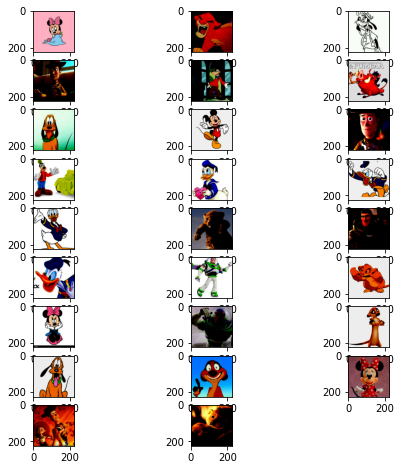

In [ ]:
train_loader, valid_loader, test_loader, classes = get_data_loader(27)
# Verification Step - obtain one batch of images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
images = images.numpy() 
print(images.shape)
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 9
for i in range(1, columns*rows):
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.transpose(images[i], [1,2,0]))

baseline model


In [ ]:
class ANN_img(nn.Module):
    def __init__(self):
        super(ANN_img, self).__init__()
        self.layer1 = nn.Linear(224 * 224 *3 , 50)
        self.layer2 = nn.Linear(50, 12)
        self.name = "ann"
    def forward(self, img):
        flattened = img.view(-1, 224 * 224 * 3)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2.squeeze(1)
        #return activation2

In [ ]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 53 * 53, 32)
        self.fc2 = nn.Linear(32, 12)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10* 53* 53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
import torchvision.models
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
VGG16 = torchvision.models.vgg.vgg16(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
train_loader, val_loader, test_loader, classes = get_data_loader(batch_size=1, num_workers=1)

2052


In [ ]:
folder_path='/content/drive/My Drive/Colab Notebooks/APS360_Project'

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/APS360_Project"

In [ ]:
def train(model, train_data, validation_data, batch_size, lr, num_epochs):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    # train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           #num_workers=num_workers, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(train_data):
          
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

          #### ALNC is alexNet.features (AlexNet without classifier) ####
          
            out = model(imgs)  # forward pass
                       
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch



            ##### Mini_batch Accuracy ##### We don't compute accuracy on the whole training set in every iteration!
            pred = out.max(1, keepdim=True)[1]
            mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
            Mini_batch_total = imgs.shape[0]
            train_acc.append((mini_batch_correct / Mini_batch_total))
           ###########################

          # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            val_acc.append(get_accuracy(model, validation_data))  # compute validation accuracy
            n += 1
            mini_b += 1
            print("Iteration: ",n,'Progress: % 6.2f ' % ((epoch * len(train_data) + mini_b) / (num_epochs * len(train_data))*100),'%', "Time Elapsed: % 6.2f s " % (time.time()-start_time))


        print ("Epoch %d Finished. " % epoch ,"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))
    model_name = "model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name, batch_size, lr, num_epochs)
    torch.save(model.state_dict(), os.path.join('/content/drive/My Drive/Random/saved_models', model_name))

    end_time= time.time()
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")    
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    train_acc.append(get_accuracy(model, train_data))
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print ("Total time:  % 6.2f s \n Time per Epoch: % 6.2f s \n\n" % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))

batch = 300 

2052
CUDA is available! Training on GPU ...
Iteration:  1 Progress:   0.95  % Time Elapsed:   6.29 s 
Iteration:  2 Progress:   1.90  % Time Elapsed:  10.09 s 
Iteration:  3 Progress:   2.86  % Time Elapsed:  13.57 s 
Iteration:  4 Progress:   3.81  % Time Elapsed:  16.73 s 
Iteration:  5 Progress:   4.76  % Time Elapsed:  19.50 s 
Epoch 0 Finished.  Time per Epoch:  19.57 s 
Iteration:  6 Progress:   5.71  % Time Elapsed:  25.73 s 
Iteration:  7 Progress:   6.67  % Time Elapsed:  29.07 s 
Iteration:  8 Progress:   7.62  % Time Elapsed:  32.29 s 
Iteration:  9 Progress:   8.57  % Time Elapsed:  35.36 s 
Iteration:  10 Progress:   9.52  % Time Elapsed:  38.11 s 
Epoch 1 Finished.  Time per Epoch:  19.09 s 
Iteration:  11 Progress:  10.48  % Time Elapsed:  44.47 s 
Iteration:  12 Progress:  11.43  % Time Elapsed:  47.78 s 
Iteration:  13 Progress:  12.38  % Time Elapsed:  51.13 s 
Iteration:  14 Progress:  13.33  % Time Elapsed:  54.24 s 
Iteration:  15 Progress:  14.29  % 

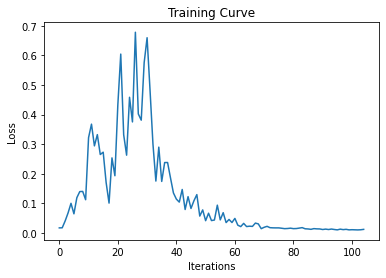

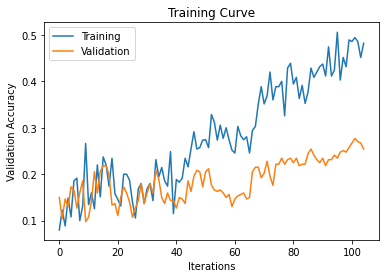

Final Training Accuracy: 0.4788823911630929
Final Validation Accuracy: 0.254071661237785
Total time:   394.20 s 
 Time per Epoch:  18.77 s 




In [ ]:
use_cuda = True
print("batch = 300 \n")
train_loader, val_loader, test_loader, classes = get_data_loader(batch_size=350, num_workers=1)
model_300_batch_size_3_layers_lr001 = ANN_img()
if use_cuda and torch.cuda.is_available():
    model_300_batch_size_3_layers_lr001.cuda()
    print('CUDA is available! Training on GPU ...')
else:
    print('CUDA is not available. Training on CPU ...')
#train(model, data_loader, data_loader, batch_size=27, lr=0.01, num_epochs=21)
train(model_300_batch_size_3_layers_lr001, train_loader, val_loader, batch_size=150, lr=0.01, num_epochs=21)

batch = 300 

2052
CUDA is available! Training on GPU ...
Iteration:  1 Progress:   0.49  % Time Elapsed:   6.28 s 
Iteration:  2 Progress:   0.98  % Time Elapsed:   9.63 s 
Iteration:  3 Progress:   1.46  % Time Elapsed:  12.88 s 
Iteration:  4 Progress:   1.95  % Time Elapsed:  16.04 s 
Iteration:  5 Progress:   2.44  % Time Elapsed:  18.91 s 
Epoch 0 Finished.  Time per Epoch:  18.97 s 
Iteration:  6 Progress:   2.93  % Time Elapsed:  25.17 s 
Iteration:  7 Progress:   3.41  % Time Elapsed:  28.39 s 
Iteration:  8 Progress:   3.90  % Time Elapsed:  31.65 s 
Iteration:  9 Progress:   4.39  % Time Elapsed:  34.79 s 
Iteration:  10 Progress:   4.88  % Time Elapsed:  37.56 s 
Epoch 1 Finished.  Time per Epoch:  18.81 s 
Iteration:  11 Progress:   5.37  % Time Elapsed:  43.67 s 
Iteration:  12 Progress:   5.85  % Time Elapsed:  47.00 s 
Iteration:  13 Progress:   6.34  % Time Elapsed:  50.37 s 
Iteration:  14 Progress:   6.83  % Time Elapsed:  53.55 s 
Iteration:  15 Progress:   7.32  % 

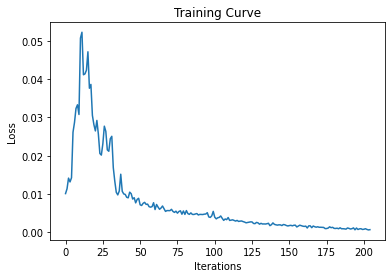

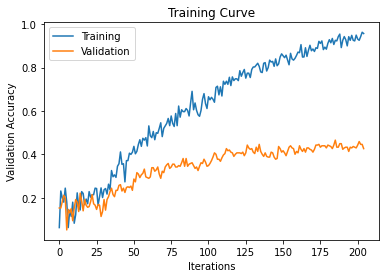

Final Training Accuracy: 0.9285250162443145
Final Validation Accuracy: 0.42671009771986973
Total time:   766.91 s 
 Time per Epoch:  18.71 s 




In [ ]:
use_cuda = True
print("batch = 300 \n")
train_loader, val_loader, test_loader, classes = get_data_loader(batch_size=350, num_workers=1)
model_300_batch_size_3_layers_lr001 = ANN_img()
if use_cuda and torch.cuda.is_available():
    model_300_batch_size_3_layers_lr001.cuda()
    print('CUDA is available! Training on GPU ...')
else:
    print('CUDA is not available. Training on CPU ...')
#train(model, data_loader, data_loader, batch_size=27, lr=0.01, num_epochs=21)
train(model_300_batch_size_3_layers_lr001, train_loader, val_loader, batch_size=250, lr=0.01, num_epochs=41)

batch = 300 

2052
CUDA is available! Training on GPU ...
Iteration:  1 Progress:   0.65  % Time Elapsed:   6.28 s 
Iteration:  2 Progress:   1.29  % Time Elapsed:   9.54 s 
Iteration:  3 Progress:   1.94  % Time Elapsed:  12.80 s 
Iteration:  4 Progress:   2.58  % Time Elapsed:  15.91 s 
Iteration:  5 Progress:   3.23  % Time Elapsed:  18.61 s 
Epoch 0 Finished.  Time per Epoch:  18.67 s 
Iteration:  6 Progress:   3.87  % Time Elapsed:  24.52 s 
Iteration:  7 Progress:   4.52  % Time Elapsed:  27.59 s 
Iteration:  8 Progress:   5.16  % Time Elapsed:  30.67 s 
Iteration:  9 Progress:   5.81  % Time Elapsed:  33.57 s 
Iteration:  10 Progress:   6.45  % Time Elapsed:  36.26 s 
Epoch 1 Finished.  Time per Epoch:  18.16 s 
Iteration:  11 Progress:   7.10  % Time Elapsed:  42.32 s 
Iteration:  12 Progress:   7.74  % Time Elapsed:  45.47 s 
Iteration:  13 Progress:   8.39  % Time Elapsed:  49.31 s 
Iteration:  14 Progress:   9.03  % Time Elapsed:  52.24 s 
Iteration:  15 Progress:   9.68  % 

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f69f00560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f69f00560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Iteration:  126 Progress:  81.29  % Time Elapsed:  471.60 s 


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f69f00560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f69f00560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Iteration:  127 Progress:  81.94  % Time Elapsed:  474.97 s 
Iteration:  128 Progress:  82.58  % Time Elapsed:  478.20 s 
Iteration:  129 Progress:  83.23  % Time Elapsed:  481.23 s 
Iteration:  130 Progress:  83.87  % Time Elapsed:  484.00 s 
Epoch 25 Finished.  Time per Epoch:  18.62 s 


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f69f00560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f69f00560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Iteration:  131 Progress:  84.52  % Time Elapsed:  490.47 s 


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f69f00560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f69f00560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Iteration:  132 Progress:  85.16  % Time Elapsed:  493.85 s 
Iteration:  133 Progress:  85.81  % Time Elapsed:  497.01 s 
Iteration:  134 Progress:  86.45  % Time Elapsed:  499.99 s 
Iteration:  135 Progress:  87.10  % Time Elapsed:  502.79 s 
Epoch 26 Finished.  Time per Epoch:  18.62 s 
Iteration:  136 Progress:  87.74  % Time Elapsed:  509.01 s 
Iteration:  137 Progress:  88.39  % Time Elapsed:  512.29 s 
Iteration:  138 Progress:  89.03  % Time Elapsed:  515.61 s 
Iteration:  139 Progress:  89.68  % Time Elapsed:  518.65 s 
Iteration:  140 Progress:  90.32  % Time Elapsed:  521.44 s 
Epoch 27 Finished.  Time per Epoch:  18.63 s 
Iteration:  141 Progress:  90.97  % Time Elapsed:  527.76 s 
Iteration:  142 Progress:  91.61  % Time Elapsed:  531.07 s 
Iteration:  143 Progress:  92.26  % Time Elapsed:  534.32 s 
Iteration:  144 Progress:  92.90  % Time Elapsed:  537.44 s 
Iteration:  145 Progress:  93.55  % Time Elapsed:  540.20 s 
Epoch 28 Finished.  Time per Epoch:  18.63 s 
Iteratio

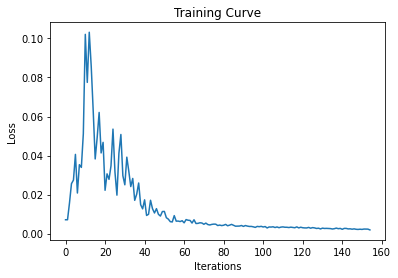

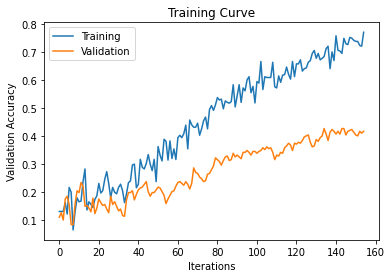

Final Training Accuracy: 0.7498375568551007
Final Validation Accuracy: 0.4169381107491857
Total time:   577.65 s 
 Time per Epoch:  18.63 s 




In [ ]:
use_cuda = True
print("batch = 300 \n")
train_loader, val_loader, test_loader, classes = get_data_loader(batch_size=350, num_workers=1)
model_300_batch_size_3_layers_lr001 = ANN_img()
if use_cuda and torch.cuda.is_available():
    model_300_batch_size_3_layers_lr001.cuda()
    print('CUDA is available! Training on GPU ...')
else:
    print('CUDA is not available. Training on CPU ...')
#train(model, data_loader, data_loader, batch_size=27, lr=0.01, num_epochs=21)
train(model_300_batch_size_3_layers_lr001, train_loader, val_loader, batch_size=350, lr=0.01, num_epochs=31)

batch = 300 

2052
CUDA is available! Training on GPU ...
Iteration:  1 Progress:   0.95  % Time Elapsed:   6.19 s 
Iteration:  2 Progress:   1.90  % Time Elapsed:   9.29 s 
Iteration:  3 Progress:   2.86  % Time Elapsed:  12.41 s 
Iteration:  4 Progress:   3.81  % Time Elapsed:  15.33 s 
Iteration:  5 Progress:   4.76  % Time Elapsed:  17.96 s 
Epoch 0 Finished.  Time per Epoch:  18.03 s 
Iteration:  6 Progress:   5.71  % Time Elapsed:  23.78 s 
Iteration:  7 Progress:   6.67  % Time Elapsed:  26.83 s 
Iteration:  8 Progress:   7.62  % Time Elapsed:  29.85 s 
Iteration:  9 Progress:   8.57  % Time Elapsed:  32.67 s 
Iteration:  10 Progress:   9.52  % Time Elapsed:  35.24 s 
Epoch 1 Finished.  Time per Epoch:  17.65 s 
Iteration:  11 Progress:  10.48  % Time Elapsed:  41.37 s 
Iteration:  12 Progress:  11.43  % Time Elapsed:  44.70 s 
Iteration:  13 Progress:  12.38  % Time Elapsed:  48.35 s 
Iteration:  14 Progress:  13.33  % Time Elapsed:  51.56 s 
Iteration:  15 Progress:  14.29  % 

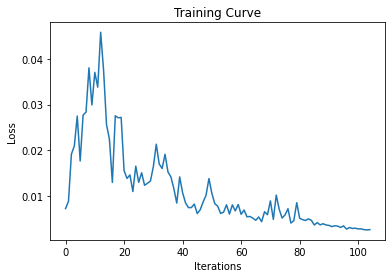

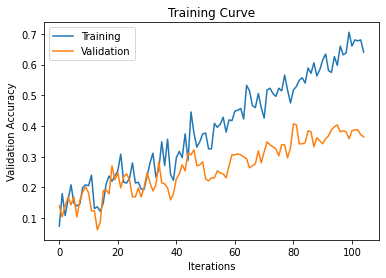

Final Training Accuracy: 0.6946068875893437
Final Validation Accuracy: 0.36482084690553745
Total time:   388.28 s 
 Time per Epoch:  18.49 s 




In [ ]:
use_cuda = True
print("batch = 300 \n")
train_loader, val_loader, test_loader, classes = get_data_loader(batch_size=350, num_workers=1)
model_300_batch_size_3_layers_lr001 = ANN_img()
if use_cuda and torch.cuda.is_available():
    model_300_batch_size_3_layers_lr001.cuda()
    print('CUDA is available! Training on GPU ...')
else:
    print('CUDA is not available. Training on CPU ...')
#train(model, data_loader, data_loader, batch_size=27, lr=0.01, num_epochs=21)
train(model_300_batch_size_3_layers_lr001, train_loader, val_loader, batch_size=350, lr=0.01, num_epochs=21)

In [ ]:
use_cuda = True
print("batch = 300 \n")
train_loader, val_loader, test_loader, classes = get_data_loader(batch_size=512, num_workers=1)
model_300_batch_size_3_layers_lr001 = LargeNet()
if use_cuda and torch.cuda.is_available():
    model_300_batch_size_3_layers_lr001.cuda()
    print('CUDA is available! Training on GPU ...')
else:
    print('CUDA is not available. Training on CPU ...')
#train(model, data_loader, data_loader, batch_size=27, lr=0.01, num_epochs=21)
train(model_300_batch_size_3_layers_lr001, train_loader, val_loader, batch_size=512, lr=0.001, num_epochs=21)

batch = 300 

12000
CUDA is available! Training on GPU ...
Iteration:  1 Progress:   0.26  % Time Elapsed:  15.70 s 
Iteration:  2 Progress:   0.53  % Time Elapsed:  25.08 s 
Iteration:  3 Progress:   0.79  % Time Elapsed:  34.26 s 
Iteration:  4 Progress:   1.06  % Time Elapsed:  43.38 s 
Iteration:  5 Progress:   1.32  % Time Elapsed:  52.67 s 
Iteration:  6 Progress:   1.59  % Time Elapsed:  61.94 s 
Iteration:  7 Progress:   1.85  % Time Elapsed:  71.23 s 
Iteration:  8 Progress:   2.12  % Time Elapsed:  80.50 s 
Iteration:  9 Progress:   2.38  % Time Elapsed:  89.85 s 
Iteration:  10 Progress:   2.65  % Time Elapsed:  99.58 s 
Iteration:  11 Progress:   2.91  % Time Elapsed:  108.98 s 
Iteration:  12 Progress:   3.17  % Time Elapsed:  118.52 s 
Iteration:  13 Progress:   3.44  % Time Elapsed:  128.05 s 
Iteration:  14 Progress:   3.70  % Time Elapsed:  137.54 s 
Iteration:  15 Progress:   3.97  % Time Elapsed:  147.04 s 
Iteration:  16 Progress:   4.23  % Time Elapsed:  155.64 s 


In [ ]:
n = 0
if not os.path.isdir(os.path.join(folder_path, 'train_2')):
    os.mkdir(os.path.join(folder_path, 'train_2'))

for img, label in train_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())
  folder_name = os.path.join(folder_path, 'train_2', str(classes[label]))
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  if not os.path.exists(os.path.join(folder_name , str(n) + '.tensor')):  
    torch.save(features_tensor.squeeze(0), os.path.join(folder_name , str(n) + '.tensor'))
  n += 1

n = 0
if not os.path.isdir(os.path.join(folder_path, 'val_2')):
    os.mkdir(os.path.join(folder_path, 'val_2'))
for img, label in val_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())
  folder_name = os.path.join(folder_path, 'val_2', str(classes[label]))
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  if not os.path.exists(os.path.join(folder_name , str(n) + '.tensor')):  
    torch.save(features_tensor.squeeze(0), os.path.join(folder_name , str(n)  + '.tensor'))
  n += 1

n = 0
if not os.path.isdir(os.path.join(folder_path, 'test_2')):
    os.mkdir(os.path.join(folder_path, 'test_2'))
for img, label in test_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())
  folder_name = os.path.join(folder_path, 'test_2', str(classes[label]))
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  if not os.path.exists(os.path.join(folder_name , str(n) + '.tensor')):  
    torch.save(features_tensor.squeeze(0), os.path.join(folder_name , str(n) + '.tensor'))
  n += 1

In [ ]:
n = 0
if not os.path.isdir(os.path.join(folder_path, 'train_vgg')):
    os.mkdir(os.path.join(folder_path, 'train_vgg'))

for img, label in train_loader:
  features = VGG16.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())
  folder_name = os.path.join(folder_path, 'train_vgg', str(classes[label]))
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  if not os.path.exists(os.path.join(folder_name , str(n) + '.tensor')):  
    torch.save(features_tensor.squeeze(0), os.path.join(folder_name , str(n) + '.tensor'))
  n += 1

n = 0
if not os.path.isdir(os.path.join(folder_path, 'val_vgg')):
    os.mkdir(os.path.join(folder_path, 'val_vgg'))
for img, label in val_loader:
  features = VGG16.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())
  folder_name = os.path.join(folder_path, 'val_vgg', str(classes[label]))
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  if not os.path.exists(os.path.join(folder_name , str(n) + '.tensor')):  
    torch.save(features_tensor.squeeze(0), os.path.join(folder_name , str(n)  + '.tensor'))
  n += 1

n = 0
if not os.path.isdir(os.path.join(folder_path, 'test_vgg')):
    os.mkdir(os.path.join(folder_path, 'test_vgg'))
for img, label in test_loader:
  features = VGG16.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())
  folder_name = os.path.join(folder_path, 'test_vgg', str(classes[label]))
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  if not os.path.exists(os.path.join(folder_name , str(n) + '.tensor')):  
    torch.save(features_tensor.squeeze(0), os.path.join(folder_name , str(n) + '.tensor'))
  n += 1

In [ ]:
class Alex(nn.Module):
    def __init__(self):
        super(Alex, self).__init__()
        self.name = "Custom"
        self.fc1 = nn.Linear(256*6*6, 100)
        self.fc2 = nn.Linear(100, 32)
        self.fc3 = nn.Linear(32, 12)

    def forward(self, img):
        flattened = img.view(-1, 256*6*6)
        activation1 = F.relu(self.fc1(flattened))
        activation2 = F.relu(self.fc2(activation1))
        output = torch.sigmoid(self.fc3(activation2))
        return output

In [ ]:
# Load Tensor Files (features) from folder

#load features
# location on Google Drive

train_features = torchvision.datasets.DatasetFolder(os.path.join(folder_path , 'train_2') , loader=torch.load, extensions=('.tensor'))
val_features = torchvision.datasets.DatasetFolder(os.path.join(folder_path , 'val_2') , loader=torch.load, extensions=('.tensor'))
test_features = torchvision.datasets.DatasetFolder(os.path.join(folder_path , 'test_2') , loader=torch.load, extensions=('.tensor'))

# Prepare Dataloader
batch_size = 250
num_workers = 1
train_feature_loader = torch.utils.data.DataLoader(train_features, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_feature_loader = torch.utils.data.DataLoader(val_features, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_feature_loader = torch.utils.data.DataLoader(test_features, batch_size=1, 
                                           num_workers=num_workers, shuffle=True)

In [ ]:
use_cuda = True
net = Alex()
if use_cuda and torch.cuda.is_available():
    net.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
def get_accuracy(model, data):
    data_loader = data

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
         
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        output = model((imgs))
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

Iteration:  1 Progress:   0.26  % Time Elapsed:   6.47 s 
Iteration:  2 Progress:   0.53  % Time Elapsed:   9.48 s 
Iteration:  3 Progress:   0.79  % Time Elapsed:  12.38 s 
Iteration:  4 Progress:   1.06  % Time Elapsed:  15.33 s 
Iteration:  5 Progress:   1.32  % Time Elapsed:  18.29 s 
Iteration:  6 Progress:   1.59  % Time Elapsed:  21.22 s 
Iteration:  7 Progress:   1.85  % Time Elapsed:  24.16 s 
Iteration:  8 Progress:   2.12  % Time Elapsed:  27.10 s 
Iteration:  9 Progress:   2.38  % Time Elapsed:  30.05 s 
Iteration:  10 Progress:   2.65  % Time Elapsed:  32.97 s 
Iteration:  11 Progress:   2.91  % Time Elapsed:  36.00 s 
Iteration:  12 Progress:   3.17  % Time Elapsed:  38.98 s 
Iteration:  13 Progress:   3.44  % Time Elapsed:  41.93 s 
Iteration:  14 Progress:   3.70  % Time Elapsed:  44.94 s 
Iteration:  15 Progress:   3.97  % Time Elapsed:  47.83 s 
Iteration:  16 Progress:   4.23  % Time Elapsed:  50.68 s 
Iteration:  17 Progress:   4.50  % Time Elapsed:  53.37 s 
Iterat

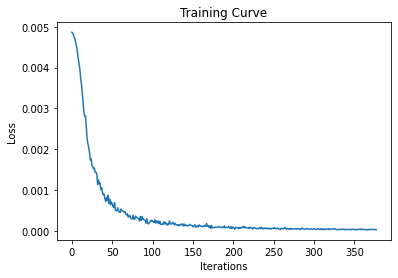

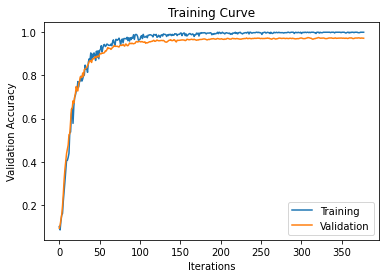

Final Training Accuracy: 0.9996666666666667
Final Validation Accuracy: 0.9722222222222222
Total time:   1121.98 s 
 Time per Epoch:  53.43 s 




In [ ]:
train(net, train_feature_loader, val_feature_loader, batch_size=512, lr=0.01, num_epochs=21)

Iteration:  1 Progress:   0.57  % Time Elapsed:  358.20 s 
Iteration:  2 Progress:   1.14  % Time Elapsed:  358.56 s 
Iteration:  3 Progress:   1.71  % Time Elapsed:  456.18 s 
Iteration:  4 Progress:   2.29  % Time Elapsed:  600.03 s 
Iteration:  5 Progress:   2.86  % Time Elapsed:  749.00 s 
Iteration:  6 Progress:   3.43  % Time Elapsed:  901.85 s 
Iteration:  7 Progress:   4.00  % Time Elapsed:  926.53 s 
Epoch 0 Finished.  Time per Epoch:  926.55 s 
Iteration:  8 Progress:   4.57  % Time Elapsed:  927.31 s 
Iteration:  9 Progress:   5.14  % Time Elapsed:  927.79 s 
Iteration:  10 Progress:   5.71  % Time Elapsed:  928.26 s 
Iteration:  11 Progress:   6.29  % Time Elapsed:  928.72 s 
Iteration:  12 Progress:   6.86  % Time Elapsed:  929.10 s 
Iteration:  13 Progress:   7.43  % Time Elapsed:  929.47 s 
Iteration:  14 Progress:   8.00  % Time Elapsed:  929.84 s 
Epoch 1 Finished.  Time per Epoch:  464.93 s 
Iteration:  15 Progress:   8.57  % Time Elapsed:  930.65 s 
Iteration:  16 Pr

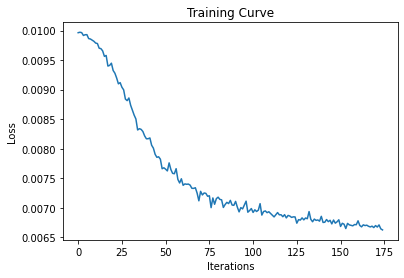

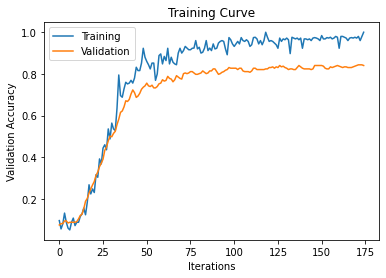

Final Training Accuracy: 0.9785575048732943
Final Validation Accuracy: 0.8403908794788274
Total time:   1006.31 s 
 Time per Epoch:  40.25 s 




In [ ]:
train(net, train_feature_loader, val_feature_loader, batch_size=250, lr=0.01, num_epochs=25)

Iteration:  1 Progress:   0.57  % Time Elapsed:   0.77 s 
Iteration:  2 Progress:   1.14  % Time Elapsed:   1.26 s 
Iteration:  3 Progress:   1.71  % Time Elapsed:   1.73 s 
Iteration:  4 Progress:   2.29  % Time Elapsed:   2.18 s 
Iteration:  5 Progress:   2.86  % Time Elapsed:   2.56 s 
Iteration:  6 Progress:   3.43  % Time Elapsed:   2.93 s 
Iteration:  7 Progress:   4.00  % Time Elapsed:   3.30 s 
Epoch 0 Finished.  Time per Epoch:   3.32 s 
Iteration:  8 Progress:   4.57  % Time Elapsed:   4.12 s 
Iteration:  9 Progress:   5.14  % Time Elapsed:   4.61 s 
Iteration:  10 Progress:   5.71  % Time Elapsed:   5.07 s 
Iteration:  11 Progress:   6.29  % Time Elapsed:   5.53 s 
Iteration:  12 Progress:   6.86  % Time Elapsed:   5.90 s 
Iteration:  13 Progress:   7.43  % Time Elapsed:   6.27 s 
Iteration:  14 Progress:   8.00  % Time Elapsed:   6.62 s 
Epoch 1 Finished.  Time per Epoch:   3.32 s 
Iteration:  15 Progress:   8.57  % Time Elapsed:   7.47 s 
Iteration:  16 Progress:   9.14  %

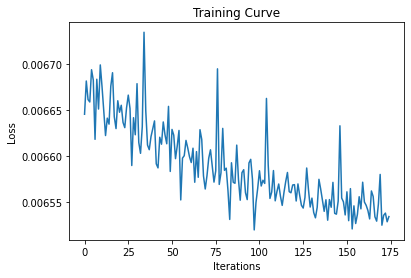

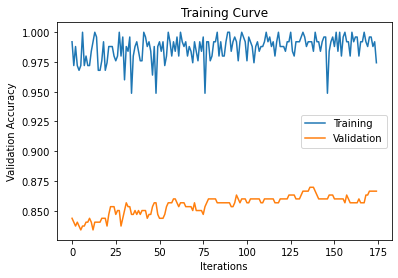

Final Training Accuracy: 0.99090318388564
Final Validation Accuracy: 0.8664495114006515
Total time:   83.60 s 
 Time per Epoch:   3.34 s 




In [ ]:
train(net, train_feature_loader, val_feature_loader, batch_size=250, lr=0.01, num_epochs=25)

In [ ]:
get_accuracy(net, test_feature_loader)

0.883495145631068

In [ ]:
characters = ['Buzz', 'Donald', 'Goofy', 'Mickey', 'Minnie', 'Pluto', 'Pumba', 'Simba', 'Tigger', 'Timon', 'Wall-e', 'Woody']
cntr = 0
for imgs, labels in test_feature_loader:
    cntr += 1
    #############################################
    #To Enable GPU Usage
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    #############################################
    
    output = net((imgs))
    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    prob = torch.sigmoid(output)

    print(characters)
    print(prob)
    print(f'output: {characters[pred[0]]}, label: {characters[labels[0]]}\n')
    if cntr == 10:
      break

['Buzz', 'Donald', 'Goofy', 'Mickey', 'Minnie', 'Pluto', 'Pumba', 'Simba', 'Tigger', 'Timon', 'Wall-e', 'Woody']
tensor([[0.5009, 0.7310, 0.5002, 0.5316, 0.5001, 0.5025, 0.5000, 0.5028, 0.5000,
         0.5000, 0.5000, 0.5000]], device='cuda:0', grad_fn=<SigmoidBackward0>)
output: Donald, label: Donald

['Buzz', 'Donald', 'Goofy', 'Mickey', 'Minnie', 'Pluto', 'Pumba', 'Simba', 'Tigger', 'Timon', 'Wall-e', 'Woody']
tensor([[0.7306, 0.5355, 0.5055, 0.5000, 0.5001, 0.5115, 0.5000, 0.5049, 0.5000,
         0.5099, 0.5587, 0.5233]], device='cuda:0', grad_fn=<SigmoidBackward0>)
output: Buzz, label: Buzz

['Buzz', 'Donald', 'Goofy', 'Mickey', 'Minnie', 'Pluto', 'Pumba', 'Simba', 'Tigger', 'Timon', 'Wall-e', 'Woody']
tensor([[0.5001, 0.5005, 0.5380, 0.5000, 0.5001, 0.5002, 0.7307, 0.5081, 0.5015,
         0.5246, 0.5000, 0.5004]], device='cuda:0', grad_fn=<SigmoidBackward0>)
output: Pumba, label: Pumba

['Buzz', 'Donald', 'Goofy', 'Mickey', 'Minnie', 'Pluto', 'Pumba', 'Simba', 'Tigger', 'Timon